# International College of Economics and Finance 

# Financial Econometrics. Class 02

## Event-studies

- Howto: An Example with Data Preparation
- Dr. Simon Müller
- [source](https://cran.r-project.org/web/packages/EventStudy/vignettes/howto_eventstudy.html)

### Overview

Today we are will see how to do an event study in R based on the Dieselgate scandal. The Volkswagen emissions scandal (also called “emissionsgate” or “dieselgate”) began in September 2015, when the United States Environmental Protection Agency (EP A) issued a notice of violation of the Clean Air Act to German automaker Volkswagen Group

In [1]:
options(warn = -1)
library(xts)
library(tidyquant)
library(dplyr)
library(readr)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: lubridate


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: PerformanceAnalytics


Attaching package: ‘PerformanceAnalytics’


The following object is masked from ‘package:graphics’:

    legend


Loading required package: quantmod

Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Version 0.4-0 included new data defaults. See ?getSymbols.

══ Need to Learn tidyquant? ════════════════════════════════════════════════════
Business Science offers a 1-hour course - Learning Lab #9: Performance Analysis & Portfolio Optimization with tidyquant!
</> Learn more at: https://university.business-science.io/p/learning-labs-pro </>


Attaching packag

### Data Preparation

We use the package `tidyquant` to fetch the automotive stock data from Yahoo Finance. As we cannot get the full volume size from this companies through Yahoo Finance API.

Let’s define the window from which we want to fetch the data of the German auto companies.

In [2]:
startDate <- "2014-05-01"
endDate <- "2015-12-31"

We focus us on the big five motor manufacturers in Germany, namely
- VW Group
    - VW
    - Audi
- Porsche
- Daimler
- BMW

In [3]:
# Firm Data
firmSymbols <- c("VOW3.DE", "NSU.DE", "PAH3.DE", "BMW.DE", "DAI.DE")
firmNames <- c("VW preferred", "Audi", "Porsche Automobil Hld", "BMW", "Daimler")
firms <- getSymbols(Symbols = firmSymbols, from = startDate, to = endDate)
firms.prices <- cbind(VOW3.DE$VOW3.DE.Adjusted, PAH3.DE$PAH3.DE.Adjusted, NSU.DE$NSU.DE.Adjusted,
DAI.DE$DAI.DE.Adjusted, BMW.DE$BMW.DE.Adjusted)
head(firms.prices)

‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.




           VOW3.DE.Adjusted PAH3.DE.Adjusted NSU.DE.Adjusted DAI.DE.Adjusted
2014-05-02         166.3827         58.60135        611.2695        48.71801
2014-05-05         166.3827         58.38600        609.3226        48.46794
2014-05-06         164.7694         56.95291        614.1895        47.92370
2014-05-07         163.8538         55.84652        614.2382        47.65892
2014-05-08         166.9495         57.60635        614.5303        47.80602
2014-05-09         166.3827         57.56180        609.1281        47.45298
           BMW.DE.Adjusted
2014-05-02        66.57825
2014-05-05        66.36887
2014-05-06        66.13704
2014-05-07        65.95009
2014-05-08        66.03234
2014-05-09        65.89774

As reference market we choose the DAX.

In [4]:
# Index Data
indexSymbol <- c("^GDAXI")
indexName <- c("DAX")
index <- getSymbols(Symbols = indexSymbol, from = startDate, to = endDate, auto.assign =  F)
head(index)

           GDAXI.Open GDAXI.High GDAXI.Low GDAXI.Close GDAXI.Volume
2014-05-02    9611.79    9627.38   9533.30     9556.02     88062300
2014-05-05    9536.38    9548.17   9407.09     9529.50     61911600
2014-05-06    9570.25    9571.63   9440.47     9467.53     82062900
2014-05-07    9418.50    9554.35   9410.08     9521.30     92732600
2014-05-08    9547.27    9622.30   9487.57     9607.40    102022500
2014-05-09    9591.32    9602.86   9558.11     9581.45     80084100
           GDAXI.Adjusted
2014-05-02        9556.02
2014-05-05        9529.50
2014-05-06        9467.53
2014-05-07        9521.30
2014-05-08        9607.40
2014-05-09        9581.45

In [5]:
# Making log returns
firms.ret <- diff(log(firms.prices))[-1] * 100
index.ret <- diff(log(index$GDAXI.Adjusted))[-1] * 100

The parameters for this Event Study are:
- Estimation window: 250
- Event window: -10 to 10
- Event date: 18.09.2015

In [6]:
startpoint = which(index(index.ret) == "2015-09-18")
estimation_window <- 250
event_window <- 20

#### Fitting market model

In [37]:
fitted.models <- list()

est_window_market <- index.ret[(startpoint - estimation_window - event_window/2):(startpoint - event_window/2 - 1)]

for(i in colnames(firms.ret)){
    est_window_returns <- firms.ret[(startpoint - estimation_window - event_window/2):(startpoint - event_window/2- 1), i]
    fitted.models[[i]] <- lm(est_window_returns ~ est_window_market)
    print(i)
    print(summary(fitted.models[[i]]))
}

[1] "VOW3.DE.Adjusted"

Call:
lm(formula = est_window_returns ~ est_window_market)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5745 -0.4788 -0.0388  0.5483  3.2121 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.04109    0.06268  -0.656    0.513    
est_window_market  1.05141    0.04426  23.757   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9909 on 248 degrees of freedom
Multiple R-squared:  0.6947,	Adjusted R-squared:  0.6935 
F-statistic: 564.4 on 1 and 248 DF,  p-value: < 2.2e-16

[1] "PAH3.DE.Adjusted"

Call:
lm(formula = est_window_returns ~ est_window_market)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5162 -0.5490 -0.0155  0.5388  2.6449 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.06513    0.05747  -1.133    0.258    
est_window_market  0.98885    0.04058  24.370   <2e-16 ***
---
Signif. codes:  0

#### Making predictions

In [111]:
predicted <- matrix(NA, nrow = event_window, ncol = length(firmSymbols))
colnames(predicted) <- c("VOW3.DE", "NSU.DE", "PAH3.DE", "BMW.DE", "DAI.DE")
for(i in 1:length(firmSymbols)){
    for(j in 1:event_window){
        predicted[j, i] <- (fitted.models[[i]]$coefficients[1] + fitted.models[[i]]$coefficients[2] * index.ret[(startpoint - event_window/2 - 1 + j)])
    }
}

# What about re-writing it in a "normal", not eye-bleeding loop... I mean matrices, of course
# Try to do it at home

predicted <- as.xts(predicted, order.by = as.Date(index(index.ret)[(startpoint - event_window/ 2):(startpoint + event_window/2-1)]))

#### Calculating abnormal returns

In [112]:
y_true <- matrix(NA, nrow = event_window, ncol = length(firmSymbols))
colnames(y_true) <- c("VOW3.DE", "NSU.DE", "PAH3.DE", "BMW.DE", "DAI.DE")
y_true <- firms.ret[(startpoint - event_window/2):(startpoint + event_window/2-1)]
ab.ret <- matrix(NA, nrow = NROW(predicted), ncol = ncol(predicted))
colnames(ab.ret) <- colnames(predicted)
for(i in 1:ncol(predicted)){
    ab.ret[, i] <- y_true[, i] - predicted[, i]
}

ab.ret <- as.data.frame(ab.ret)
rownames(ab.ret) <- as.Date(index(predicted))

#### Calculating abnormal returns  
Remember that $J_{3} = [\frac{N^{+}}{N}-0.5]\frac{\sqrt{N}}{0.5}\rightarrow^{d}\mathcal{N(0, 1)}$

In [116]:
J_3 <- vector()
p_value <- vector()
for (i in colnames(ab.ret)){
    J_3[i] <- ((sum(ab.ret[i] > 0) / nrow(ab.ret[i])) - 0.5)*(sqrt(nrow(ab.ret[i]))/0.5)
    p_value[i] <- ifelse(J_3[i] > 0, 2*(1-pnorm(J_3[i])), 2 * pnorm(J_3[i])) # how can you change this line without using 0.5?
}
print(firmSymbols)
print(J_3)
sprintf("%.3f", p_value)

[1] "VOW3.DE" "NSU.DE"  "PAH3.DE" "BMW.DE"  "DAI.DE" 
   VOW3.DE     NSU.DE    PAH3.DE     BMW.DE     DAI.DE 
 0.0000000  0.0000000 -1.3416408  0.4472136  1.7888544 


[1] "1.000" "1.000" "0.180" "0.655" "0.074"

- Still, it is very usefull, especially for you home assignment, to calculate CARs and SCARS
- For simplicity, let's do this only for one stock

In [117]:
vow <- firms.ret$VOW3.DE.Adjusted # let's pick VW

In [118]:
event_returns <- vow[(startpoint - event_window/2):(startpoint + event_window/2-1)]

In [119]:
event_market <- index.ret[(startpoint - event_window/2):(startpoint + event_window/2-1)]

In [120]:
est_window_vow <- vow[(startpoint - estimation_window - event_window/2):(startpoint - event_window/2- 1)]

In [121]:
vow_model <- lm(est_window_vow ~ est_window_market)

In [122]:
summary(vow_model)


Call:
lm(formula = est_window_vow ~ est_window_market)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5745 -0.4788 -0.0388  0.5483  3.2121 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.04109    0.06268  -0.656    0.513    
est_window_market  1.05141    0.04426  23.757   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9909 on 248 degrees of freedom
Multiple R-squared:  0.6947,	Adjusted R-squared:  0.6935 
F-statistic: 564.4 on 1 and 248 DF,  p-value: < 2.2e-16


In [123]:
coeff_vow <- as.numeric(vow_model$coefficients)

In [124]:
out_of_sample <- as.matrix(cbind(rep(1, event_window), event_market))

In [125]:
in_sample <- as.matrix(cbind(rep(1, estimation_window), est_window_market))

In [126]:
predictions <- out_of_sample %*% coeff_vow

In [127]:
abnorm_returns <- event_returns - predictions

In [128]:
abnorm_returns

           VOW3.DE.Adjusted
2015-09-04       0.19510900
2015-09-07      -0.35696989
2015-09-08       0.90968908
2015-09-09       1.37974522
2015-09-10      -0.07489486
2015-09-11       0.93956384
2015-09-14      -0.55122943
2015-09-15       0.70642787
2015-09-16      -0.09582368
2015-09-17      -1.07974730
2015-09-18       0.04178897
2015-09-21     -20.87600330
2015-09-22     -17.97546387
2015-09-23       4.63967223
2015-09-24       2.66535957
2015-09-25      -7.24979604
2015-09-28      -5.45888258
2015-09-29      -3.80731675
2015-09-30       0.37320304
2015-10-01       0.41258668

In [129]:
ab.ret[1]

,VOW3.DE
,<dbl>
2015-09-04,0.19510900
2015-09-07,-0.35696989
2015-09-08,0.90968908
2015-09-09,1.37974522
2015-09-10,-0.07489486
2015-09-11,0.93956384
2015-09-14,-0.55122943
2015-09-15,0.70642787
2015-09-16,-0.09582368


- I hope that you remember this formula from lecture  
$$\sigma(c)^2 = \hat{\sigma}_{\varepsilon_i}^2\cdot c'(I + X^{*}(X'X)^{-1}X'^{*})\cdot c$$

In [130]:
ones <- diag(event_window)

In [131]:
var_abnorm <- (summary(vow_model)$sigma)^2*(ones + out_of_sample %*% solve(t(in_sample) %*% in_sample)%*% t(out_of_sample))

In [132]:
c_matrix <- t(lower.tri(matrix(1,event_window,event_window),diag = TRUE))

In [133]:
event_car <- c(rep(0, event_window))

In [134]:
event_car[event_window/2] <- 1

In [135]:
c_matrix <- cbind(c_matrix, event_car)

In [136]:
CARs_for_each_c <- t(c_matrix)%*%abnorm_returns

In [137]:
Var_for_each_c <- diag(t(c_matrix)%*%var_abnorm%*%c_matrix)

In [138]:
SCAR_for_each_c <- CARs_for_each_c/sqrt(Var_for_each_c)

In [139]:
SCAR_for_each_c

,VOW3.DE.Adjusted
,0.1950301
,-0.1147991
,0.4331075
,1.0650878
,0.9170739
,1.2174770
,0.9178483
,1.1052116
,1.0084558
,0.6170143


In [140]:
p_vals_asym <- 2*(1-pnorm(abs(SCAR_for_each_c)))

In [141]:
p_vals_student <- 2*(1-pt(abs(SCAR_for_each_c), df=estimation_window-2))

In [142]:
p_vals <- cbind(p_vals_asym, p_vals_student)

In [143]:
colnames(p_vals) <- c("Asymptotic SCARs p-val", "Student-t SCARs p-val")

In [144]:
p_vals

,Asymptotic SCARs p-val,Student-t SCARs p-val
,8.453694e-01,8.455291e-01
,9.086044e-01,9.086973e-01
,6.649367e-01,6.653131e-01
,2.868362e-01,2.878721e-01
,3.591039e-01,3.599949e-01
,2.234228e-01,2.245799e-01
,3.586983e-01,3.595900e-01
,2.690679e-01,2.701390e-01
,3.132357e-01,3.142186e-01
,5.372253e-01,5.377913e-01


In [145]:
abnorm_returns[,1] <- round(as.numeric(abnorm_returns),5)

In [146]:
colnames(abnorm_returns) <- c("Abnormal Returns")

In [147]:
colnames(CARs_for_each_c) <- c("CARs for each c")

In [148]:
p_vals <- round(p_vals, 3)

In [149]:
results <- list(summary(vow_model), abnorm_returns, CARs_for_each_c, p_vals)

In [150]:
results

[[1]]

Call:
lm(formula = est_window_vow ~ est_window_market)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5745 -0.4788 -0.0388  0.5483  3.2121 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.04109    0.06268  -0.656    0.513    
est_window_market  1.05141    0.04426  23.757   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9909 on 248 degrees of freedom
Multiple R-squared:  0.6947,	Adjusted R-squared:  0.6935 
F-statistic: 564.4 on 1 and 248 DF,  p-value: < 2.2e-16


[[2]]
           Abnormal Returns
2015-09-04          0.19511
2015-09-07         -0.35697
2015-09-08          0.90969
2015-09-09          1.37975
2015-09-10         -0.07489
2015-09-11          0.93956
2015-09-14         -0.55123
2015-09-15          0.70643
2015-09-16         -0.09582
2015-09-17         -1.07975
2015-09-18          0.04179
2015-09-21        -20.87600
2015-09-22        -17.97546
2015-09-23  

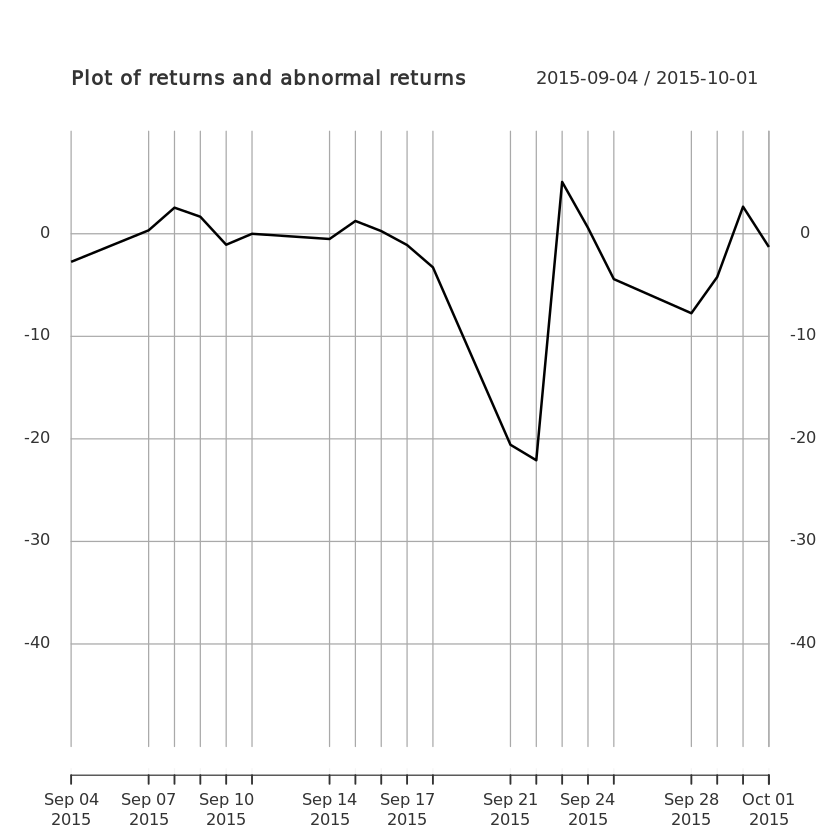

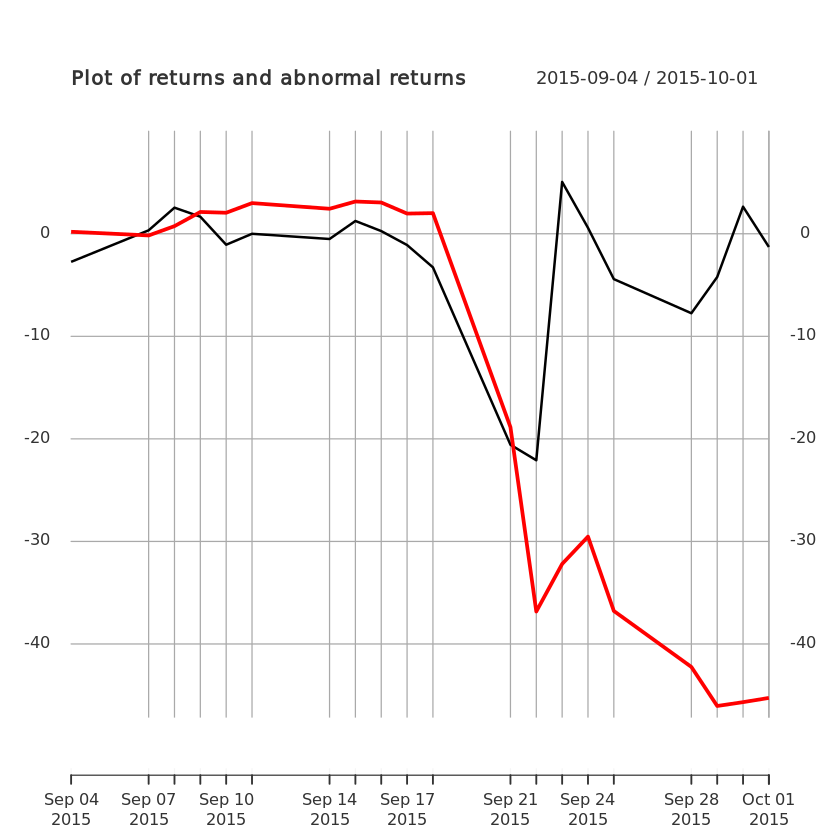

In [200]:
plot(vow[(startpoint-event_window/2):(startpoint+event_window/2-1)], 
     main = 'Plot of returns and abnormal returns', 
     ylim = c(-50, 10), 
     col = 'black')

lines(cumsum(abnorm_returns), 
      col = 'red', 
      lwd = 3)

legend('bottomleft',
       legend = c('Returns', 'Cumulative Abnormal Returns'), 
       col = c('black', 'red'), 
       lty=1, 
       lwd = 1)